In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df = pd.read_csv("HistoricalQuotes.csv")
df.dropna()

,Date,Close,Volume,Open,High,Low
0,2/28/2020,273.36,106721200,257.26,278.41,256.37
1,2/27/2020,273.52,80151380,281.10,286.00,272.96
2,2/26/2020,292.65,49678430,286.53,297.88,286.50
3,2/25/2020,288.08,57668360,300.95,302.53,286.13
4,2/24/2020,298.18,55548830,297.26,304.18,289.23
...,...,...,...,...,...,...
2513,3/5/2010,31.28,224647427,30.71,31.39,30.66
2514,3/4/2010,30.10,89591907,29.90,30.13,29.80
2515,3/3/2010,29.90,92846488,29.85,29.98,29.71
2516,3/2/2010,29.84,141486282,29.99,30.12,29.68


In [5]:
df.index = pd.to_datetime(df.Date)

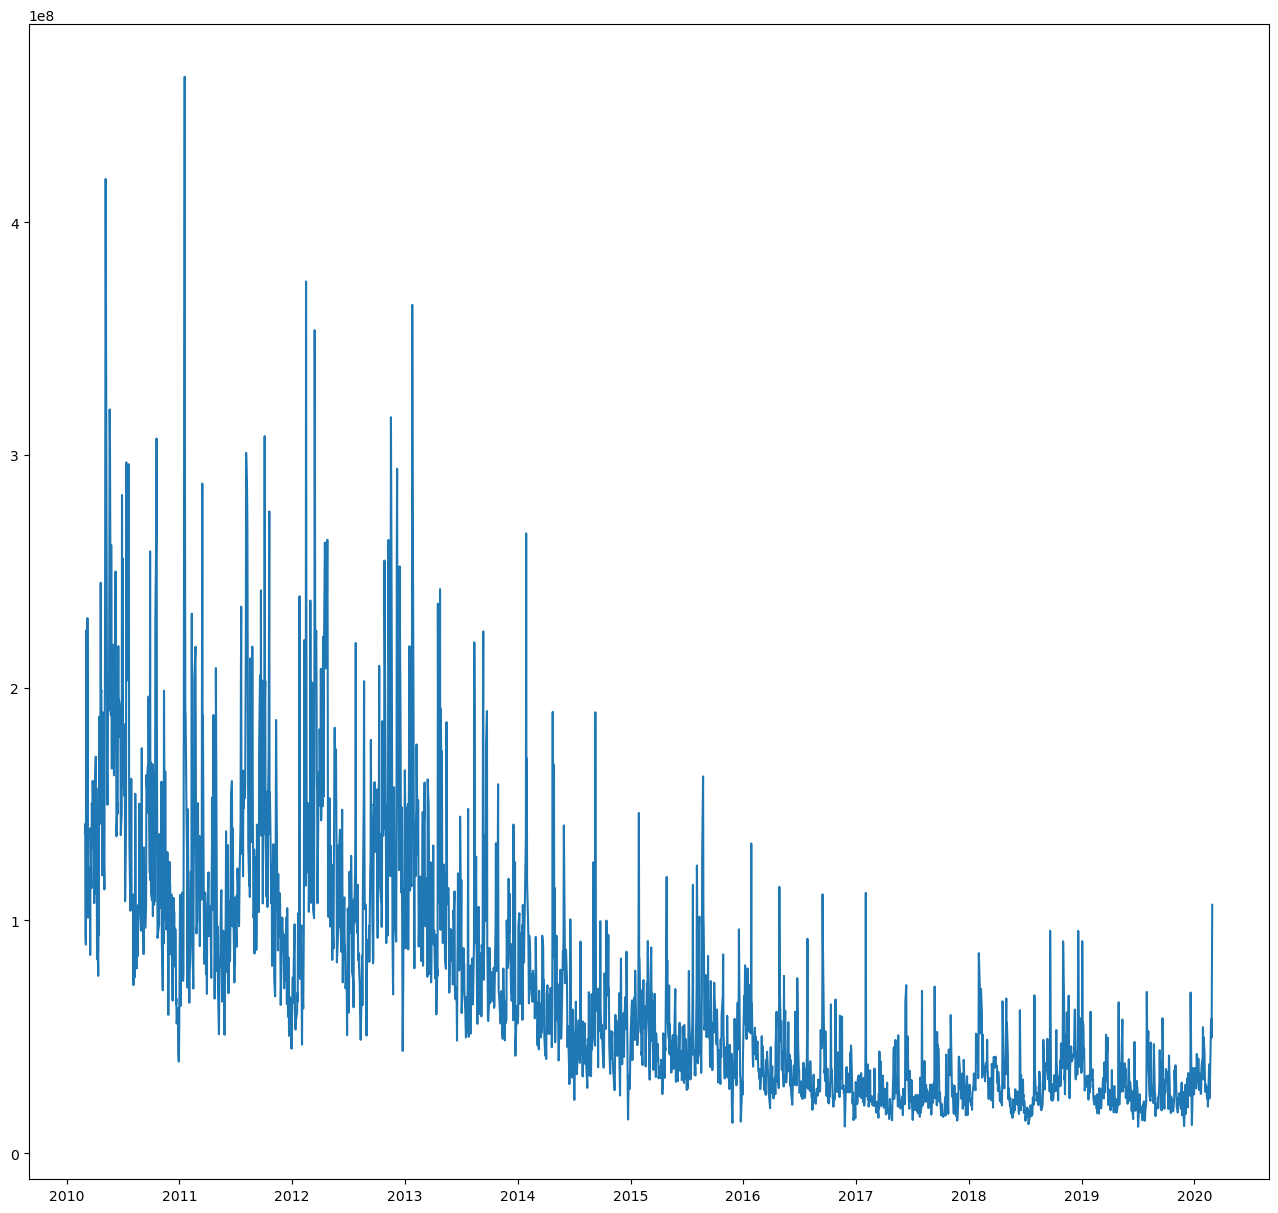

In [10]:
plt.xlabel = ('Time')
plt.ylabel = ('Volume')

dfVol = df['Volume']
plt.figure(figsize=(16,15))

plt.plot(dfVol)
plt.show()

## Check Stationarity

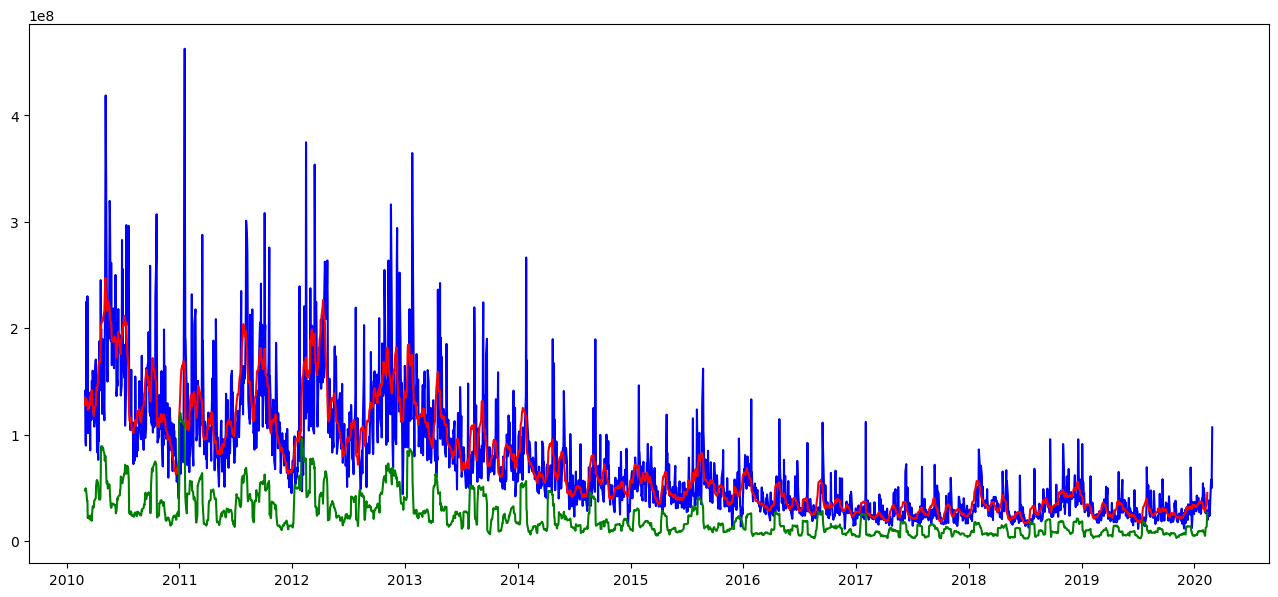

In [12]:
rollmean = dfVol.rolling(12).mean()
rollstd = dfVol.rolling(12).std()

plt.figure(figsize=(16,7))

orig = plt.plot(dfVol, color = 'blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Mean')
std = plt.plot(rollstd, color='green', label='Standard Deviation')

## Decomposition

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(dfVol, model='additive',period=1)

trend =  decompose.trend
season = decompose.seasonal
resid = decompose.resid


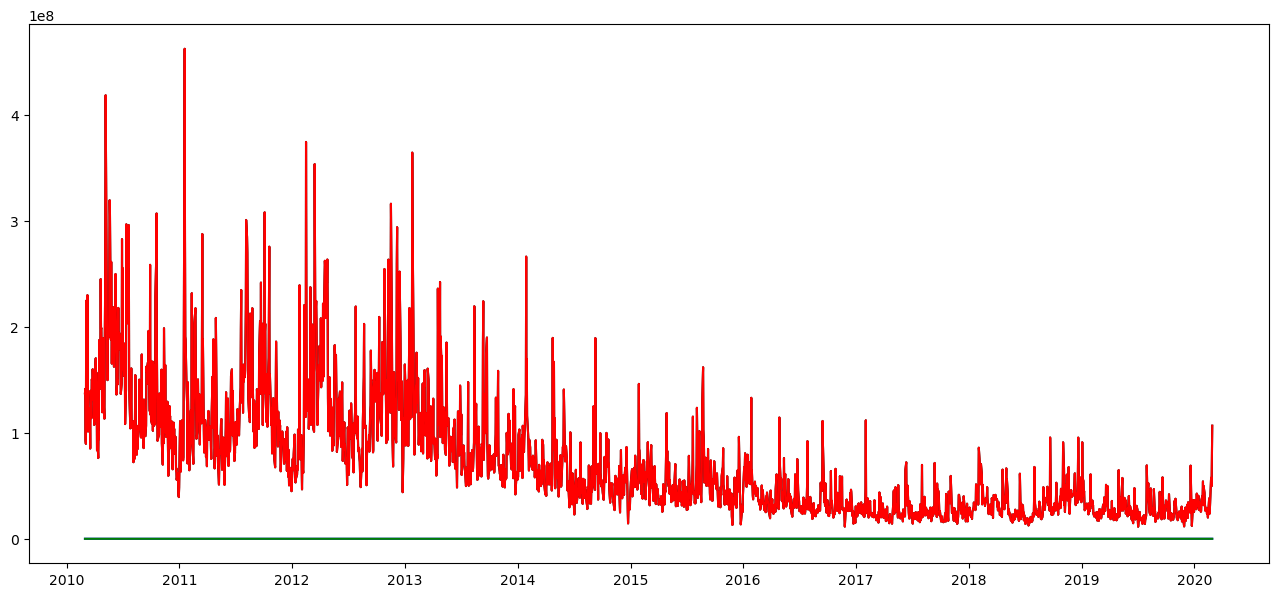

In [32]:
plt.figure(figsize=(16,7))

plt.plot(dfVol, label='Original', color='black')
plt.plot(trend, label='Trend', color = 'red')
plt.plot(season, label='Season', color='blue')
plt.plot(resid, label='Resid', color='green')

plt.show()

## Stationary: constant mean/std

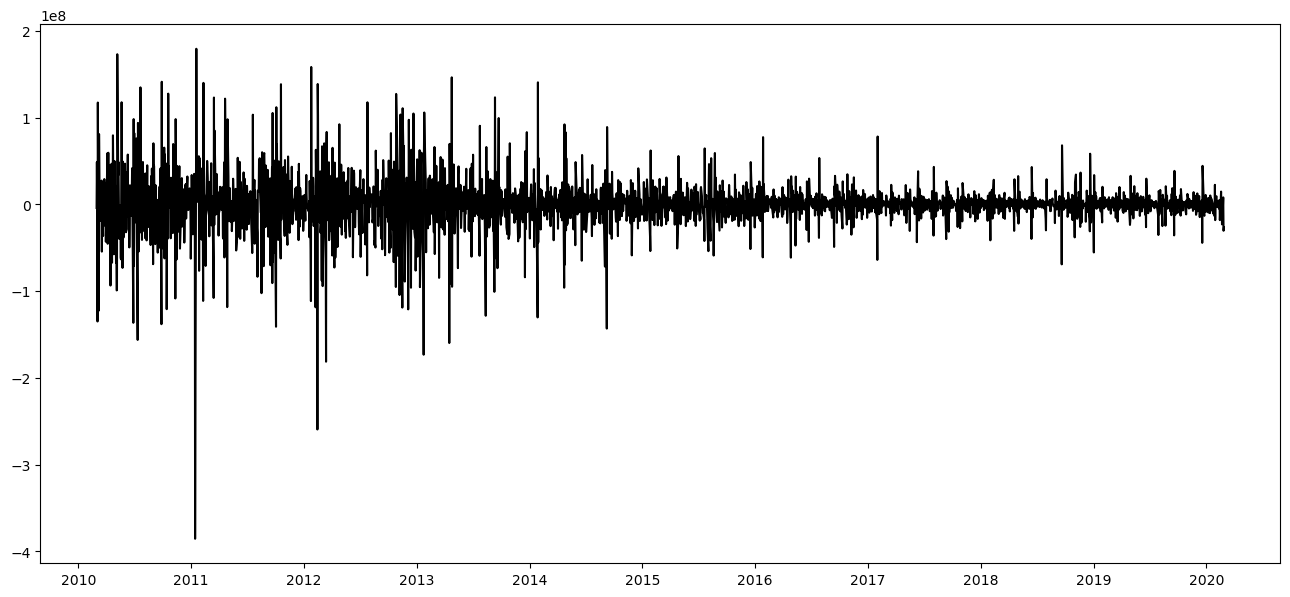

In [33]:
df_diff = dfVol - dfVol.shift()
df_diff = df_diff.dropna()

plt.figure(figsize=(16,7))

plt.plot(df_diff, label='Original', color='black')

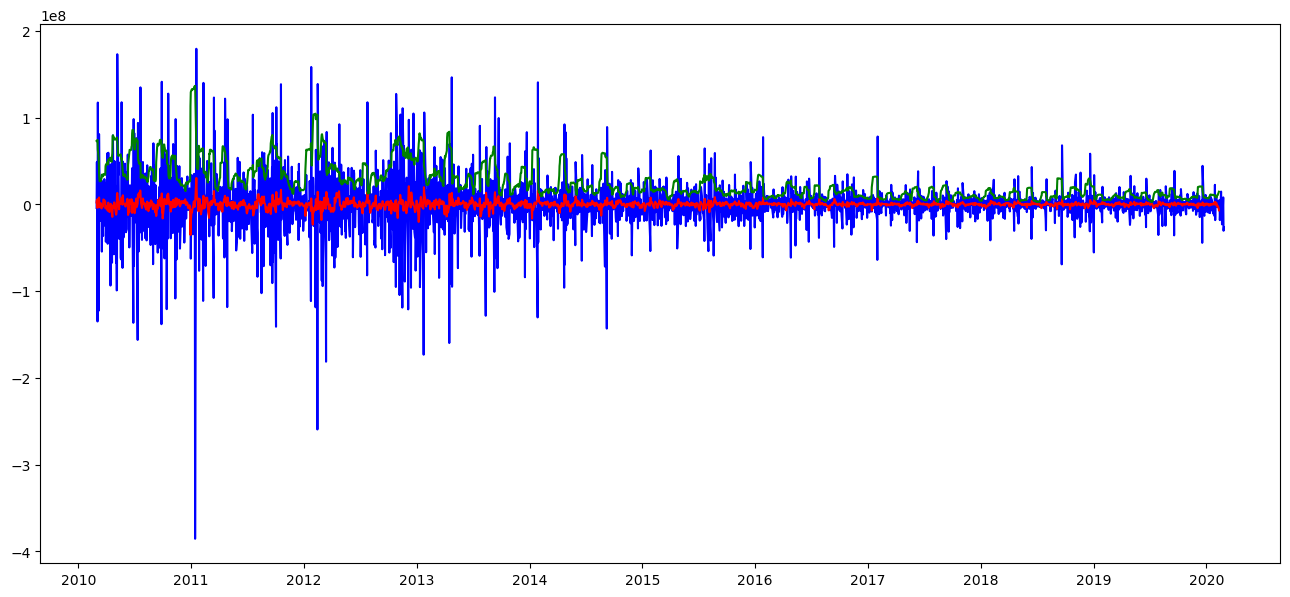

In [43]:
rollmean2 = df_diff.rolling(12).mean()
rollstd2 = df_diff.rolling(12).std()

plt.figure(figsize=(16,7))

orig = plt.plot(df_diff, color = 'blue', label='Original')
mean = plt.plot(rollmean2, color='red', label='Mean')
std = plt.plot(rollstd2, color='green', label='Standard Deviation')

plt.show()

In [41]:
decompose2 = seasonal_decompose(df_diff, model='additive',period=1)

trend2 =  decompose2.trend
season2 = decompose2.seasonal
resid2 = decompose2.resid

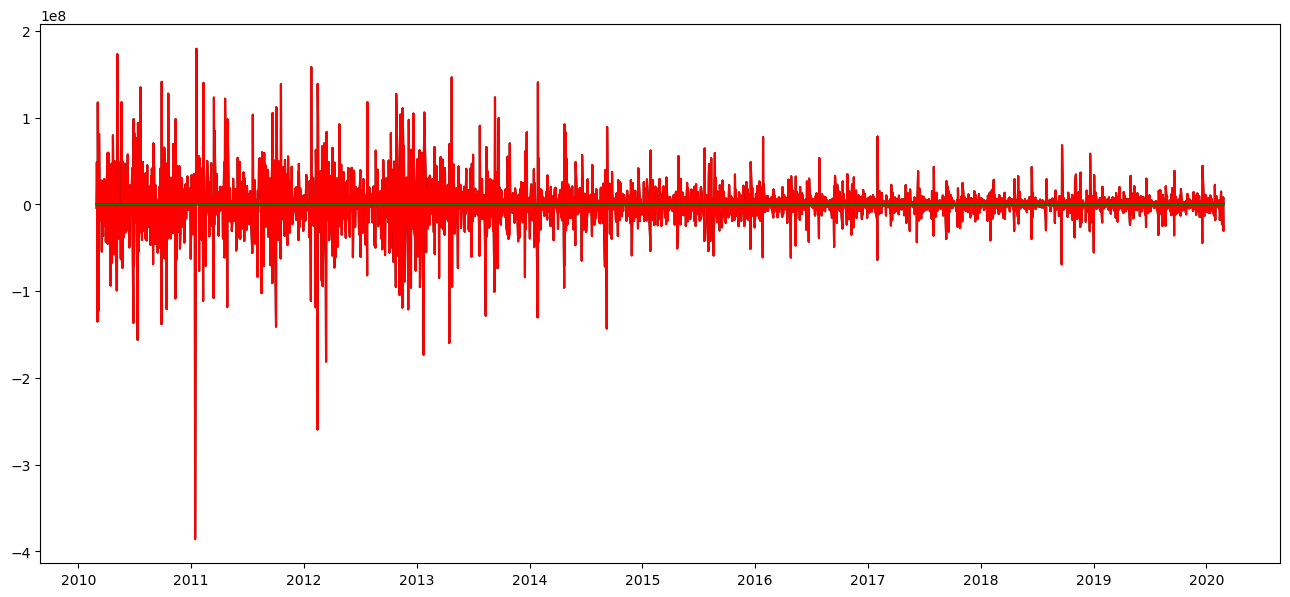

In [42]:
plt.figure(figsize=(16,7))

plt.plot(df_diff, label='Original', color='black')
plt.plot(trend2, label='Trend', color = 'red')
plt.plot(season2, label='Season', color='blue')
plt.plot(resid2, label='Resid', color='green')

plt.show()

ACF and PACF

In [44]:
from statsmodels.tsa.stattools import acf, pacf

In [45]:
acf1 = acf(df_diff, nlags=20)
nacf1 = pacf(df_diff, nlags=20) 

In [47]:
import statsmodels.api as sm

AttributeError: Line2D.set() got an unexpected keyword argument 'axis'

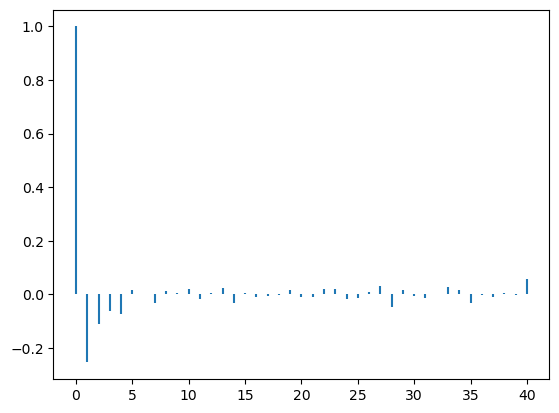

In [48]:
sm.graphics.tsa.plot_acf(df_diff, lags=40, axis=1)

AttributeError: Line2D.set() got an unexpected keyword argument 'axis'

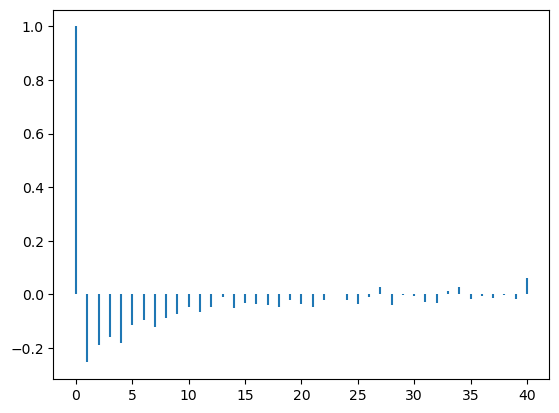

In [49]:
sm.graphics.tsa.plot_pacf(df_diff, lags=40, axis=1)

## Arima Model (Time Series)

In [57]:
from statsmodels.tsa.arima.model import ARIMA

In [58]:
arima = ARIMA(df_diff, order=(1,1,1))

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packa

In [59]:
arima_fit = arima.fit()

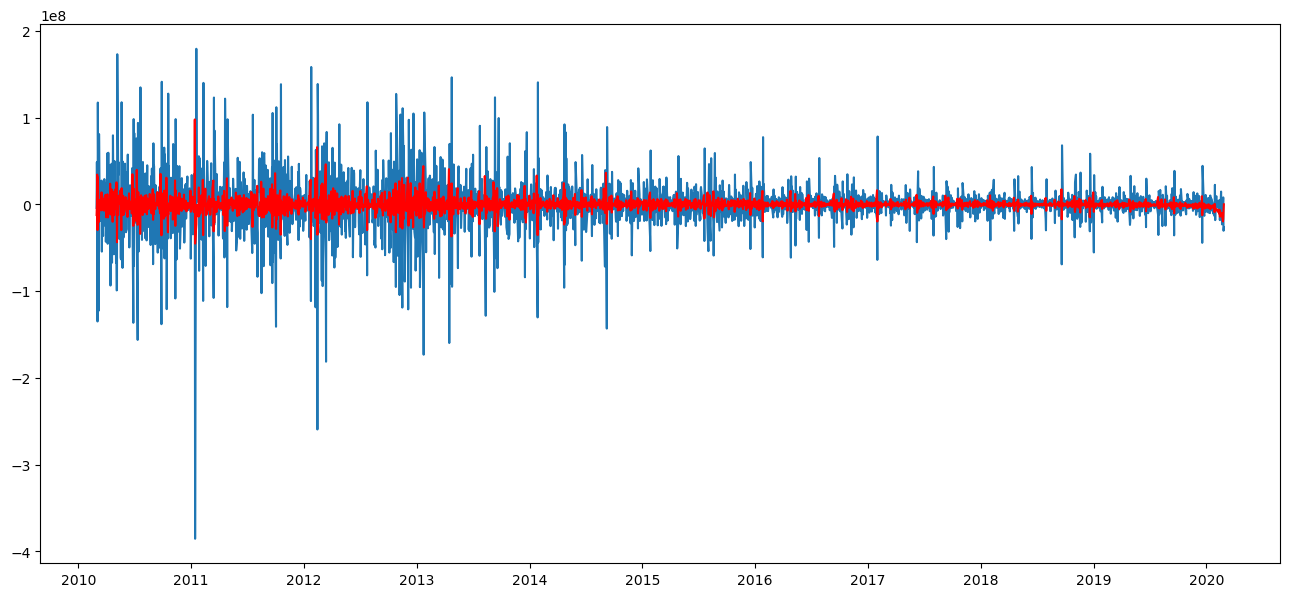

In [61]:
plt.figure(figsize=(16,7))
plt.plot(df_diff)
plt.plot(arima_fit.fittedvalues, color='red')

## RETURN BACK TO ORIGINAL SCALE

In [62]:
arimaSeries = pd.Series(arima_fit.fittedvalues, copy=True)
arimaSum = arimaSeries.cumsum()

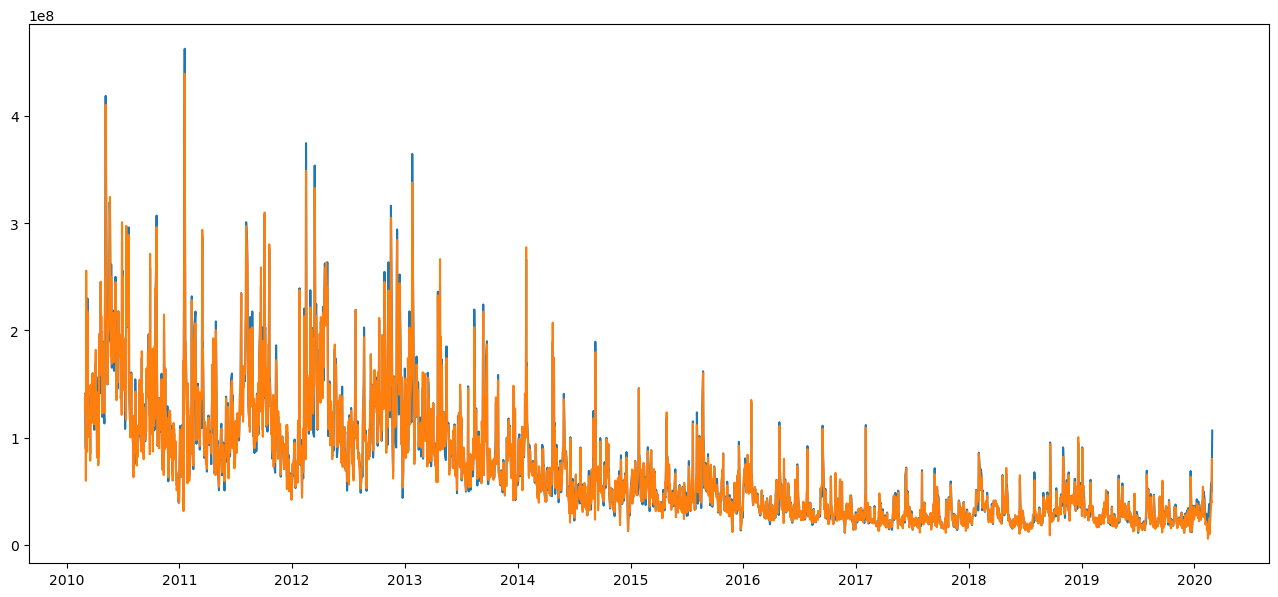

In [65]:
plt.figure(figsize=(16,7))

plt.plot(dfVol)
plt.plot(arimaSeries + dfVol)

In [67]:
forecast = arima_fit.forecast(steps= 10)

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
